In [1]:
from IPython.core.display import HTML

HTML("<style>" + open("style.css").read() + "</style>")

<div class="headline">
Language Technology / Sprachtechnologie
<br><br>
Wintersemester 2019/2020
</div>
<br>
<div class="description">
    Übung zum Thema <i id="topic">"N-grams"</i>
    <br><br>
    Deadline Abgabe: <i #id="submission">Thursday, 31.10.2019 (23:55 Uhr)</i>
</div>

# Präsenzübung



### Organization

Each week you will receive a handout with some theoretical and/ or programming tasks related to NLP. You can also work on them at home, but be aware that in the practice class you have the opportunity to discuss and ask questions. <br>
Each handout also contains homework. Working on these homework tasks and handing them in is not mandatory, but you can benefit from that in two ways: You get feedback on your solutions and a better understanding of the subject, and, more importantly, you have the chance to improve your final grade for the exam. If you hand in your solutions, we will grade them based on their quality. For each homework task there are points to collect depending on the amount
of work you have to put into it. You will find the maximum number of points to gain for a task in its header. <br>
Finally, if you want to hand in your solutions, please use the Moodle system. Please only submit Jupyter notebooks.
The deadline for the homework is XXX. Later submissions will not be graded.


### Installation

In order to be able to complete the exercises and the homework, you need to install Python (http://www.python.org) and Jupyter (https://jupyter.org). 
As we are working with the Natural Language Toolkit (NLTK), please also install NLTK (http://www.nltk.org) and its packages.

For further information also refer to: <br>
https://www.nltk.org/install.html <br>
http://www.nltk.org/data.html


In [4]:
import nltk
from nltk.probability import FreqDist
from nltk.probability import ConditionalFreqDist
from nltk.corpus import*
from nltk.book import*

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Warm Up

<div class="task_description">
    <i class="task">Task 2.1:</i> <br>
</div>

Discuss in which of the following cases a frequency distribution may be used reasonably:
1. To save a list of tokens.
2. To count, how often each word type occurs in a given document.
3. To find collocations in a text.
4. To count, how often adjectives, nouns or verbs occur in a given text.
5. To compute the number of occurrences of each item in a list

<strong style="color: blue">Lösung:</strong>

1. is false. As in a frequency distribution the keys are stored as a set, multiple occurrences of a certain token will be merged into a single key. Additionally, the original ordering of the tokens will be lost.
2. is true. This is one of the main uses of a FD, e.g. initialize it with a list of words.
3. is true. If the FD is initialized with bigrams, it can be used to analyze which bigrams occur most often in a document.
4. is true. For this purpose, the FD should be initialized with the part-of-speech tags from a document, e.g. initialize it with ['PRP','VBP','TO','VB']
5. is true. We can initialize the FD with the list and later output the list contents by just printing the FD.

<div class="task_description">
    <i class="task">Task 2.2:</i> <br>
</div>

Discuss in which of the following cases a conditional frequency distribution may be used reasonably:
1. To count how often each word type occurs in a given document, which belongs to a given category.
2. To find collocations in a text.
3. To count how often adjectives, nouns or verbs occur in a given text.

<strong style="color: blue">Lösung:</strong>

1. is true. We need to (a) initialize Conditional Frequency Distribution (CFD) with (category,word) pairs;
2. is true. We could e.g. use the left token in a bigram as the condition and then store a frequency distribution of all tokens that appear on the right of this token. However, the focus in using the conditional frequency distribution instead of a frequency distribution only is slightly different, e.g. we may use it to find all collocations with ’red’ being the first word.
3. is true. For a simple count it would be better to use a normal frequency distribution, but a CFD would allow us e.g. to store how often certain tokens are used in a certain word class.

<div class="task_description">
    <i class="task">Task 2.3:</i> <br>
</div>

Token/Type/Vocabulary: Which of the following statements are true?
1. Every token is a type.
2. The vocabulary of a text consists of all tokens.
3. The vocabulary of a text consists of all types.
4. The vocabulary of a text consists of the union of all tokens and all types.
5. The vocabulary of a text consists of the intersection of all tokens and all types.

<strong style="color: blue">Lösung:</strong>

1. Since there exist different definitions for the terms token and type, a simple true or false is not appropriate. We define a token as a sequence of characters, including punctuation, excluding whitespace. Different capitalization of the same word, e.g. “car” and “Car” are regarded as different types. Different appearances of the same token, e.g. “car” are collapsed to one type “car”. A token is a particular appearance of a given word in a text, i.e. the LIST (or sequence) of tokens represents the text, while the SET of tokens represents the vocabulary and an element in this set is called a type. Consider e.g. the string “1 2 3 4 5 1 2 3 4 5”. There are 10 tokens, but there are only 5 types.
2. False.
3. True.
4. If you speak of a union, you speak of sets and not of lists (within the context of lists you speak of appending or merging). So, strictly if you take the set of all tokens you will end up with the vocabulary already (the elements of this set are called types). If you take a union of a set with itself, you end up with the set itself. Under this consideration, you could answer true.
5. Same as above

<div class="task_description">
    <i class="task">Task 2.4:</i> <br>
</div>

Lists in Python: Let l and m be lists of words. Which of the following lines are syntactically correct?

In [3]:
#1: l.index("hi") 
#2: [l] - 2
#3: x = 1 + m
#4: x = 1 & m
#5: l[1,4]

<strong style="color: blue">Lösung:</strong>

1. Is syntactically correct, but it will throw a ValueError, if "hi" is not in the list l.
2. Is syntactically correct, as lists are cylic in Python, but it will throw an IndexError if the list 1 has less than 2 elements.
3. Is syntactically correct. It will append the list m to the list l and assigns the resulting list to the variable x.
4. Throws a TypeError. Remember: It will work for sets and & means to intersect two sets.
5. Throws a TypeError. Remember: l[l:4] represents a subset of a list.

### Introduction

<div class="task_description">
    <i class="task">Task 2.5:</i> <br>
</div>

Explore some texts provided by NLTK (to avoid slow reactions do the following with a sublist of text1, i.e.
t = text1[:500]) and explain the meaning of the following:

In [4]:
t = text1[:500]
print(str("len:"),len(t))

len: 500


<strong style="color: blue">Lösung:</strong>

len(t)- length of t;

In [5]:
print("sorted(t):",sorted(t))


sorted(t): ['"', '"', '"', "'", "'", "'", '(', '(', ')', ').', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '--', '--', '--', '--', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '."', '."', '."', '...', '...', '1851', ';', ';', ';', ';', ';', ';', 'A', 'ANGLO', 'As', 'BALEINE', 'BALLENA', 'CETUS', 'Consumptive', 'DANISH', 'DICTIONARY', 'DICTIONARY', 'DUTCH', 'Dan', 'Dan', 'Dick', 'Dut', 'ENGLISH', 'ERROMANGOAN', 'ETYMOLOGY', 'EXTRACTS', 'FEGEE', 'FRENCH', 'Far', 'GREEK', 'Ger', 'Grammar', 'H', 'HACKLUYT', 'HVAL', 'HVALT', 'HVALT', 'HWAL', 'He', 'He', 'Herman', 'I', 'I', 'IAN', 'ICELANDIC', 'It', 'It', 'KETOS', 'LATIN', 'Late', 'Leviathan'

<strong style="color: blue">Lösung:</strong>

sorted(t) - sorted list of words in t

In [6]:
print("set(t):",set(t))


set(t): {"'", 'many', 'have', 'higgledy', ']', 'statements', 'commentator', 'too', 'He', 'which', 'The', 'extracts', 'I', 'WEBSTER', 'gospel', 'hand', 'Sub', 'loved', 'maketh', 'alone', 'been', 'ever', 'devil', '.', 'world', '--', 'reminded', 'our', 'earth', 's', 'whatever', 'embellished', 'must', 'out', 'of', 'however', 'but', 'animal', 'has', 'for', ',', 'promiscuously', 'sallow', 'Dut', 'are', 'is', 'with', 'Herman', 'called', 'gone', 'leaving', 'body', '[', 'immediately', 'rosy', 'CETUS', 'SWEDISH', 'view', 'poor', 'Vaticans', 'a', 'EXTRACTS', 'could', 'ignorance', 'deliver', '...', 'grub', 'WHOEL', 'the', 'fare', 'heart', 'book', 'WALLEN', 'BALLENA', 'authentic', 'somehow', 'HVALT', 'see', 'brain', 'more', 'Usher', 'generations', 'others', 'gay', 'signification', 'random', 'street', 'DUTCH', 'name', 'profane', 'touching', 'School', 'take', 'Supplied', 'in', 'and', 'dusting', 'DANISH', 'old', 'true', 'appears', 'painstaking', 'that', 'as', 'you', 'from', 'Sherry', 'ANGLO', 'burrowe

<strong style="color: blue">Lösung:</strong>

set(t) - set of words in t, a set has no double entries

In [7]:
print("sorted(set(t)):",sorted(set(t)))


sorted(set(t)): ['"', "'", '(', ')', ').', ',', '-', '--', '.', '."', '...', '1851', ';', 'A', 'ANGLO', 'As', 'BALEINE', 'BALLENA', 'CETUS', 'Consumptive', 'DANISH', 'DICTIONARY', 'DUTCH', 'Dan', 'Dick', 'Dut', 'ENGLISH', 'ERROMANGOAN', 'ETYMOLOGY', 'EXTRACTS', 'FEGEE', 'FRENCH', 'Far', 'GREEK', 'Ger', 'Grammar', 'H', 'HACKLUYT', 'HVAL', 'HVALT', 'HWAL', 'He', 'Herman', 'I', 'IAN', 'ICELANDIC', 'It', 'KETOS', 'LATIN', 'Late', 'Leviathan', 'Librarian', 'Melville', 'Moby', 'NUEE', 'PEKEE', 'Pale', 'RICHARDSON', 'S', 'SAXON', 'SPANISH', 'SWEDISH', 'School', 'Sherry', 'So', 'Sub', 'Supplied', 'Sw', 'The', 'Therefore', 'This', 'Thou', 'Usher', 'Vaticans', 'WAL', 'WALLEN', 'WALW', 'WEBSTER', 'WHALE', 'WHOEL', 'While', '[', ']', 'a', 'affording', 'all', 'allusions', 'almost', 'alone', 'am', 'ancient', 'and', 'animal', 'any', 'anyways', 'appearing', 'appears', 'arched', 'are', 'as', 'at', 'authentic', 'authors', 'be', 'been', 'belongest', 'bird', 'body', 'book', 'brain', 'burrower', 'but', 'by

<strong style="color: blue">Lösung:</strong>

sorted(set(t)) - sorted returns a list, even if a set is given as an argument

In [8]:
print("len(set(t)):",len(set(t)))


len(set(t)): 269


<strong style="color: blue">Lösung:</strong>

len(set(t)) - length of set of words used in t, that is the length of vocabulary used in the text

Find out which types of the sentence "Today it's nice weather. Is it not nice today :-)?" are contained in the Chat Corpus of NLTK.

<strong style="color: blue">Lösung:</strong>



In [9]:
weatherTokens = ["Today","it´s", "nice", "weather" ,"." ,"Is" ,"it", "not" ,"nice" ,"today", ":-)", "?"]
set1 = set(weatherTokens)
set2 = set(text5)
print (set1 & set2)

{'.', 'not', ':-)', 'it', '?', 'weather', 'nice', 'Is', 'today'}


<div class="task_description">
    <i class="task">Task 2.6:</i> <br>
</div>

*Task 2.6.1:* Explain the following function, what does it compute? (Level 1)

In [10]:
words = [w for w in text1.tokens if w.lower().startswith('e')]
print(set(words[:10]))
print('count:', len(words))
print('count:', len(set(words)))

{'ETYMOLOGY', 'earth', 'ENGLISH', 'every', 'extracts', 'ERROMANGOAN', 'embellished', 'EXTRACTS', 'ever'}
count: 3999
count: 764


<strong style="color: blue">Lösung:</strong>
    
The function calculates how many words starting with the letter e are contained in a corpus. It is not important if the 'e' is in upper or lower case as all words are converted to lower case.

*Task 2.6.2:* Change the function above so that it extracts all words from a corpus that start and end with the letter 's' and consists out of 4 letters, the output should contain all found words and the count of them. (Level 2)

<strong style="color: blue">Lösung:</strong>

In [11]:
words = [w for w in text1.tokens if w.lower().startswith('s') and w.lower().endswith('s') and len(w) == 4]
print(set(words[:10]))
print('count:', len(words))
print('count:', len(set(words)))

{'saws', 'seas', 'says', 'Subs'}
count: 161
count: 15


*Task 2.6.3:* Another way of finding interesting tokens in a corpus is to see which ones do not occur in another corpus. Write a method that prints all tokens that only appear in a certain corpus, given another corpus. (Level 3)

<strong style="color: blue">Lösung:</strong>

In [12]:
set1 = set(text3)
set2 = set(text5)
print (set1 - set2)

{'frost', 'consumed', 'throughout', 'sackcloth', 'Aner', 'bank', 'chi', 'Elparan', 'sacrifices', 'millions', 'earring', 'dipped', 'fury', 'goeth', 'ceased', 'steward', 'wroth', 'saidst', 'prayed', 'priests', 'Cainan', 'Shechem', 'broth', 'Arbah', 'pressed', 'watered', 'Ophir', '?)', 'creature', 'Phara', 'occasion', 'yourselves', 'poverty', 'pilgrimage', 'household', 'Beersheba', 'Shalt', 'spicery', 'weep', 'shrank', 'Upon', 'Zimran', 'Hereby', 'bury', 'sight', 'Cast', 'Pinon', 'overdrive', 'touching', 'compasseth', 'deceitfully', 'leaped', 'Hiddekel', 'Ithran', 'Rebek', 'began', 'Cush', 'Am', 'haven', 'defiledst', 'among', 'spent', 'eleven', 'cities', 'Haste', 'Philistim', 'Letushim', 'Slay', 'plenteousness', 'committed', 'conception', 'Dothan', 'wilt', 'meal', 'tithes', 'Mam', 'overtake', 'Elam', 'feeble', 'Edomites', 'storehouses', 'bereaved', 'endued', 'Dinah', 'bracelets', 'ye', 'hated', 'lamp', 'Kenaz', 'rulers', 'beari', 'Mesha', 'pigeon', 'washed', 'Ashbel', 'bou', 'Gaza', 'twen

## Frequency Distribution

<div class="task_description">
    <i class="task">Task 2.7:</i> <br>
</div>

*Task 2.7.1:* Use a frequency distribution and print the vocabulary of Moby Dick (text1).

<strong style="color: blue">Lösung:</strong>

In [14]:
fdist = FreqDist(text1)
print(fdist)
vocabulary = fdist.keys()
print (vocabulary)

<FreqDist with 19317 samples and 260819 outcomes>
dict_keys(['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'a', 'Late', 'Consumptive', 'Usher', 'to', 'Grammar', 'School', ')', 'The', 'pale', '--', 'threadbare', 'in', 'coat', ',', 'heart', 'body', 'and', 'brain', ';', 'I', 'see', 'him', 'now', 'He', 'was', 'ever', 'dusting', 'his', 'old', 'lexicons', 'grammars', 'with', 'queer', 'handkerchief', 'mockingly', 'embellished', 'all', 'the', 'gay', 'flags', 'of', 'known', 'nations', 'world', 'loved', 'dust', 'it', 'somehow', 'mildly', 'reminded', 'mortality', '"', 'While', 'you', 'take', 'hand', 'school', 'others', 'teach', 'them', 'what', 'name', 'whale', '-', 'fish', 'is', 'be', 'called', 'our', 'tongue', 'leaving', 'out', 'through', 'ignorance', 'letter', 'H', 'which', 'almost', 'alone', 'maketh', 'signification', 'word', 'deliver', 'that', 'not', 'true', '."', 'HACKLUYT', 'WHALE', '...', 'Sw', 'Dan', 'HVAL', 'This', 'animal', 'named', 'fr

*Task 2.7.2:* Find the 20 most and least frequent words in Moby Dick (text1). Using the command fdist.hapaxes() you can also find words that only appear once (hapaxes)

<strong style="color: blue">Lösung:</strong>

In [15]:
fdist = FreqDist(text1)
print("most common: ", fdist.most_common(20))
print("least common: ", fdist.most_common()[:-20-1:-1])
print("hapaxes: ", fdist.hapaxes()[:10])

most common:  [(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632)]
least common:  [('orphan', 1), ('retracing', 1), ('sheathed', 1), ('padlocks', 1), ('dirgelike', 1), ('Buoyed', 1), ('liberated', 1), ('Till', 1), ('Ixion', 1), ('closing', 1), ('suction', 1), ('halfspent', 1), ('THEE', 1), ('ESCAPED', 1), ('ONLY', 1), ('Epilogue', 1), ('thrill', 1), ('etherial', 1), ('intercept', 1), ('incommoding', 1)]
hapaxes:  ['Herman', 'Melville', ']', 'ETYMOLOGY', 'Late', 'Consumptive', 'School', 'threadbare', 'lexicons', 'mockingly']


<div class="task_description">
    <i class="task">Task 2.8:</i> <br>
</div>


*Task 2.8.1:* Write a funtion that computes how many times the word "lol" appears in the chat corpus (text 5) and how much this is as a percentage of the total number of words in this text. (Level 2)

<strong style="color: blue">Lösung:</strong>

In [16]:
print(text5.count('lol'))
print((text5.count('lol')) / len(text5)*100,'%')

704
1.5640968673628082 %


*Task 2.8.2:* Adapt the code from task X.X to find the 20 most common words in a corpus starting with 'th'.

<strong style="color: blue">Lösung:</strong>

In [17]:
words = [w for w in text2.tokens if w.lower().startswith('th')]
fdist = FreqDist(words)
print("most common: ", fdist.most_common(20))

most common:  [('the', 3861), ('that', 1297), ('their', 463), ('them', 462), ('they', 428), ('this', 372), ('than', 360), ('The', 243), ('there', 209), ('think', 209), ('though', 204), ('thing', 185), ('then', 126), ('thought', 116), ('therefore', 93), ('They', 90), ('three', 60), ('This', 59), ('these', 56), ('those', 48)]


*Task 2.8.3:* We can also look at the distribution of word lengths in a text by creating a FreqDist out of a list of numbers, with each number being the length of the corresponding word in the text. <br>
Compare the count and frequency of the most frequent word length in Moby Dick (text1) to those in Monty Python and the Holy Grail (text6).

<strong style="color: blue">Lösung:</strong>

In [18]:
fdist = FreqDist(len(w) for w in text1)  
print(fdist.max())

3


From this we see that the most frequent word length is 3.

In [19]:
print(fdist[3])
print(fdist.freq(3))

50223
0.19255882431878046


From this we see that 50223 (or 20%) of the words in Moby Dick have three letters. 

In [20]:
fdist2 = FreqDist(len(w) for w in text6) 
print(fdist2.max())
print(fdist2[fdist2.max()])
print(fdist2.freq((fdist2.max())))

1
5982
0.3525667472151824


In Monty Python and the Holy Grail 5982 occurences of three-letter-words can be counted, but they make up for 35% of the text.

## Conditional Frequency Distribution

<div class="task_description">
    <i class="task">Task 2.9:</i> <br>
</div>

Write a function get_word_frequency that extracts the most frequent word with `n` letters from a corpus `c`. (Level 3)

<strong style="color: blue">Lösung:</strong>

In [21]:
def most_frequent_with_n_letters(n,c):
    cfd = nltk.ConditionalFreqDist((len(word), word) for word in c.tokens)
    return cfd[n].most_common(1)
    
print(most_frequent_with_n_letters(3, text1))
print(most_frequent_with_n_letters(4, text1))

[('the', 13721)]
[('that', 2982)]


<div class="task_description">
    <i class="task">Task 2.10:</i> <br>
</div>

One of the corpora in NLTK is the US Presidential Inaugural Addresses. An interesting property of
this collection is its time dimension: The corpus contains an address for each president.

*Task 2.10.1:* Take a look at the function below. Without executing the code on your PC, describe what the resulting chart shows. Then execute it to verify your answer. (Level 1)

In [22]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

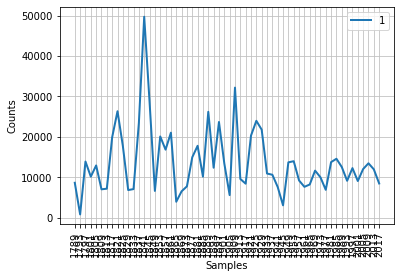

   1789  1793  1797  1801  1805  1809  1813  1817  1821  1825  1829  1833  1837  1841  1845  1849  1853  1857  1861  1865  1869  1873  1877  1881  1885  1889  1893  1897  1901  1905  1909  1913  1917  1921  1925  1929  1933  1937  1941  1945  1949  1953  1957  1961  1965  1969  1973  1977  1981  1985  1989  1993  1997  2001  2005  2009  2013  2017 
1  8619   791 13877 10137 12908  7001  7157 19887 26326 17741  6817  7058 23417 49700 28716  6605 20081 16815 21017  3926  6503  7734 14938 17767 10145 26179 12349 23659 13408  5568 32164  9563  8395 20298 23949 21764 10903 10607  7571  3039 13679 13955  9190  7618  8193 11624  9991  6873 13735 14561 12523  9114 12250  9053 12018 13439 11949  8449 
None


In [25]:
cfd = nltk.ConditionalFreqDist((len(w), fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.raw(fileid))
cfd.plot()
print(cfd.tabulate())


*Task 2.10.2:* Enhance the function above so that it plots the number of distinct tokens (without duplicates) for each speech. (Level 2)

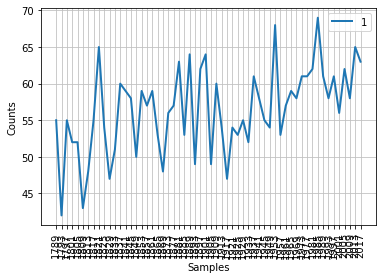

  1789 1793 1797 1801 1805 1809 1813 1817 1821 1825 1829 1833 1837 1841 1845 1849 1853 1857 1861 1865 1869 1873 1877 1881 1885 1889 1893 1897 1901 1905 1909 1913 1917 1921 1925 1929 1933 1937 1941 1945 1949 1953 1957 1961 1965 1969 1973 1977 1981 1985 1989 1993 1997 2001 2005 2009 2013 2017 
1   55   42   55   52   52   43   48   55   65   54   47   51   60   59   58   50   59   57   59   53   48   56   57   63   53   64   49   62   64   49   60   54   47   54   53   55   52   61   58   55   54   68   53   57   59   58   61   61   62   69   61   58   61   56   62   58   65   63 
None


In [5]:
cfd = nltk.ConditionalFreqDist((len(w), fileid[:4])
    for fileid in inaugural.fileids()
    for w in set(inaugural.raw(fileid)))
cfd.plot()
print(cfd.tabulate())

*Task 2.10.3:* Let’s look at how the words “America” and “citizen” are used over time. Use a CFD and plot how often each of those two words are used in each inaugural address. (Level 3)

<strong style="color: blue">Lösung:</strong>   

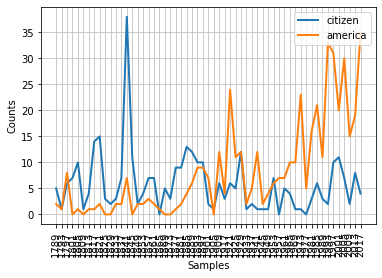

In [6]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))
cfd.plot()

<div class="task_description">
    <i class="task">Task 2.11:</i> <br>
</div>

*Task 2.11.1:* Pick 20 first names randomly – male and female

*Task 2.11.2:* Fill in the table below: <br>

| - | male   | female | sum
|------|------|------|-----
|  ends in 'a' | ? | ? | ?
|  ends not with an 'a' | ? | ? | ?
|  sum | ? | ? | ?

<strong style="color: blue">Lösung:</strong> 
    
We pick up the names of politicians and actresses: Winston, Clement, Anthony, Harold, Alexander, Harold, Edward, James, Margaret, John, T ony, Alice, N ancy, Cristen, Dolly, Pamela, Judith, Jennifer, Elizabeth, Tina

| - | male   | female | sum
|------|------|------|-----
|  ends in 'a' | 0 | 3 | 3
|  ends not with an 'a' | 10 | 7 | 17
|  sum | 10 | 10 | 20


*Task 2.11.3:* Calculate the probability, that a name which ends in ’a’ is a female name.

<strong style="color: blue">Lösung:</strong> 

$P(female|ends with 'a') = \frac{Number Female Names Ending With A}{Number Male And Female Names Ending With A} $<br><br>



*Task 2.11.4:* Use the conditional frequency distribution over the Names corpus to verify the hypothesis that first names ending with an ‘a’ are most likely female. (Level 3)

<strong style="color: blue">Lösung:</strong> 

The solution is given in the following listing:

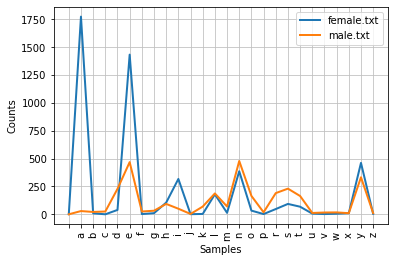

In [8]:
cfd = nltk.ConditionalFreqDist((gender,name[-1])
    for gender in names.fileids()
    for name in names.words(gender)
    )
cfd.plot()

We notice from the plot that the names ending with 'a' are mostly female.

## Generation

<div class="task_description">
    <i class="task">Task 2.12:</i> <br>
</div>

Using the given conditional frequency distribution over bigrams from the Brown corpus, complete the method
generate so that it generates sentences given a certain target word. Then change the underlying corpus
(e.g. use the Book of Genesis corpus) and compare the results. (Level 3)

<strong style="color: blue">Lösung:</strong> 

In [9]:
# build a distribution of bigrams
cfd = nltk.ConditionalFreqDist([(w1, w2) for (w1, w2) in nltk.bigrams(brown.words())])
cfd['house']

FreqDist({',': 74, '.': 57, 'and': 36, 'in': 17, 'of': 12, 'to': 11, 'with': 11, "''": 11, 'was': 10, 'for': 10, ...})

In [12]:
def generate(cfd, start, length):
    current = start
    for i in range(length):
        print(current)
        (next_word, freq) = cfd[current].most_common(1)[0]
        current = next_word
    print('---')
              
generate(cfd, 'I', 10)
generate(cfd, 'house', 10)

I
was
a
few
years
ago
,
and
the
same
---
house
,
and
the
same
time
,
and
the
same
---


## Sentence Probability

<div class="task_description">
    <i class="task">Task 2.13:</i> <br>
</div>

Compute the probability of the sentence "the city is old" under bigram models from two different nltk corpora. Under which corpus is the sentence more probable? Can you find (trial and error) a sentence that is more likely for the other corpus without being directly contained in it?"

<strong style="color: blue">Lösung:</strong> 

In [13]:
cfd_1 = nltk.ConditionalFreqDist([(w1, w2) for (w1, w2) in nltk.bigrams(genesis.words())])
cfd_2 = nltk.ConditionalFreqDist([(w1, w2) for (w1, w2) in nltk.bigrams(gutenberg.words())])

 
def computeBigramProbability(cfd, wordlist):
    probability = 1
    for i in range(len(wordlist)-1):
        w1 = wordlist[i]
        w2 = wordlist[i+1]
        #print(cfd[w1])
        bigramProb = cfd[w1].freq(w2)
        print(w1, w2, bigramProb)
        probability = probability*bigramProb
    print("overall probability: ", probability)

sentence = ["the", "city", "is", "old"]


computeBigramProbability(cfd_1, sentence)
computeBigramProbability(cfd_2, sentence)


the city 0.010124946143903489
city is 0.04819277108433735
is old 0.003316749585406302
overall probability:  1.6184053457856883e-06
the city 0.004540827687120272
city is 0.01873767258382643
is old 0.0005017561465127947
overall probability:  4.269169215295208e-08


## Tokens

<div class="task_description">
    <i class="task">Task 2.14:</i> <br>
</div>

Consider the following text: “Today it’s nice weather. Is it not nice today :-) ?” <br>
1. What is the length of this text? What may be counted?
2. What are reasonable tokens?
3. State the types and the vocabulary of this short text according to your chosen tokens.

<strong style="color: blue">Lösung:</strong> 

1. It is not obvious what to count and what to regard as a token. One may be interested in the number of characters including or excluding white spaces. In addition ":-)"may be regarded as one token (smiley) or as 3 tokens. If you use len("Today it's ...") you will get 51, as all characters including whitespaces are count. If you use NLTK to first split the string into tokens and then count its items, you will get 14. You could also use the function split to produce the tokens, which will result in 11 tokens. See the code below. 

In [15]:
text = "Today it's nice weather. Is it not nice today :-) ?"
wordsNLTK = nltk.word_tokenize(text)
print(wordsNLTK)
len(wordsNLTK)

['Today', 'it', "'s", 'nice', 'weather', '.', 'Is', 'it', 'not', 'nice', 'today', ':', '-', ')', '?']


15

In [16]:
wordsSplit = text.split()
print(wordsSplit)
len(wordsSplit)

['Today', "it's", 'nice', 'weather.', 'Is', 'it', 'not', 'nice', 'today', ':-)', '?']


11

2. As discussed earlier there is more than one possible representation. We include punctuation and split the text into the following tokens: Today, it’s, nice, weather, ., Is, it, not, nice, today, :-), ?
3. We get the following types: 'Today',"it's",'nice','weather','Is','it','not','today',':-)','?' vocabulary: set([’Today’, ït’s", ’nice’, ’weather’, ’.’, ’Is’, ’it’, ’not’, ’today’, ’:-)’, ’?’])

<div class="task_description">
    <i class="task">Task 2.15:</i> <br>
</div>

*Task 2.15.1:* Take a look at the code below. Without executing it on your computer, what is the output? (Level 1)

In [17]:
s = "Hello. This is a text. A text that contains sentences, which contain words. It has no greater meaning!"
for stc in nltk.sent_tokenize(s):
    print(stc)


Hello.
This is a text.
A text that contains sentences, which contain words.
It has no greater meaning!


<strong style="color: blue">Lösung:</strong> 

The code gets each sentence from s seperately and prints it out:<br>
Hello.<br>
This is a text.<br>
A text that contains sentences, which contain words.<br>
It has no greater meaning!<br>

*Task 2.15.2:* Change the function above so that it extracts all tokens contained in String s. (Hint: Use the segmenter!) (Level 2)

<strong style="color: blue">Lösung:</strong> 

In [18]:
s = "Hello. This is a text. A text that contains sentences, which contain words. It has no greater meaning!"
for w in nltk.word_tokenize(s):
    print(w)

Hello
.
This
is
a
text
.
A
text
that
contains
sentences
,
which
contain
words
.
It
has
no
greater
meaning
!


*Task 2.15.3:* Change the document in order to make it particularly difficult for the tokenizer to work correctly. Run it again and check how well it performed.

<strong style="color: blue">Lösung:</strong>

Depends on how creative you are :)

# Hausübung

<div class="task_description">
    <i class="task">Homework 2.1:</i>
        ::: 6 Homework points :::</div>

Implement a language guesser, i.e. a function that takes a given text and outputs the language it thinks the text is written in. The function should base its decision on the frequency of individual characters in each language.

*Task 2.1.1:* Implement a function get_language_cfd(languages, words) which takes a list of languages as an argument and returns a conditional frequency distribution where:
* the languages are the conditions
* the values are the lower case characters found in the words for each language <br>
Inside the function you can access the UDHR corpus to get samples for several languages.

*Task 2.1.2:* Develop an algorithm which calculates the overall score of a given text based on the frequency of characters accessible by language_model_cfd[language].freq(character). Implement a function guessLanguage that returns the most likely language for a given text according to your algorithm from the previous sub task.

*Task 2.1.3:* Test your implementation with the data text1, text2 and text3.

In [ ]:
def get_language_cfd(languages, words):
    """Build a ConditionalFrequencyDistribution of character frequencies in the UDHR corpus conditioned 
    on each language"""
    

def guess_language(language_model_cfd, text):
    """Returns the guessed language for the given text"""

    
languages = ['English', 'German_Deutsch', 'French_Francais']
# build the language models
# udhr contains the Universal Declaration of Human Rights in over 300 languages
language_base = dict((language, udhr.words(language + '-Latin1')) for language in languages)
language_model_cfd = get_language_cfd(languages, language_base)

# print the models for visual inspection (you always should have a look at the data :)
for language in languages:
    for key in language_model_cfd[language].keys():
        print(language, key, "->", language_model_cfd[language].freq(key))
  
text1 = "Peter had been to the office before they arrived."
text2 = "Si tu finis tes devoirs, je te donnerai des bonbons."
text3 = "Das ist ein schon recht langes deutsches Beispiel."

# guess the language by comparing the frequency distributions
print()
print(guess_language(language_model_cfd, text1)) # English 2.88
print()
print(guess_language(language_model_cfd, text2)) # French_Francais 2.74
print()
print(guess_language(language_model_cfd, text3)) # German_Deutsch 3.03

If your function does not detect the correct language for at least two of these sentences, improve your algorithm.

*Task 2.1.4:* Discuss why English and German texts are difficult to distinguish with the given approach.

<div class="task_description">
    <i class="task">Homework 2.2:</i>
        ::: 4 Homework points :::</div>

The previous language guesser was based on the frequency of characters. Implement alternative language guesser based on the following lexical units:

*Task 2.2.1:* tokens

*Task 2.2.2:* character bigrams

*Task 2.2.3:* token bigrams

<div class="task_description">
    <i class="task">Homework 2.3:</i>
        ::: 1 extra exam bonus point :::</div>

We will evaluate your system on unknown data. 1 extra exam bonus point will be awarded to the 3 teams who submitted the best system. The final results will be presented in the lecture.